# 1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import re
from collections import Counter
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 2. Data Loading

In [2]:
data = pd.read_csv('fake_reviews_dataset.csv')
data['text_'] = data['text_'].astype(str)

# 3. Data Exploration

In [3]:
data.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [5]:
data.groupby('category')['rating'].mean()

category
Books_5                         4.254691
Clothing_Shoes_and_Jewelry_5    4.172817
Electronics_5                   4.167503
Home_and_Kitchen_5              4.246795
Kindle_Store_5                  4.373996
Movies_and_TV_5                 4.148272
Pet_Supplies_5                  4.209685
Sports_and_Outdoors_5           4.316776
Tools_and_Home_Improvement_5    4.306117
Toys_and_Games_5                4.343437
Name: rating, dtype: float64

In [6]:
data['rating'].value_counts()

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

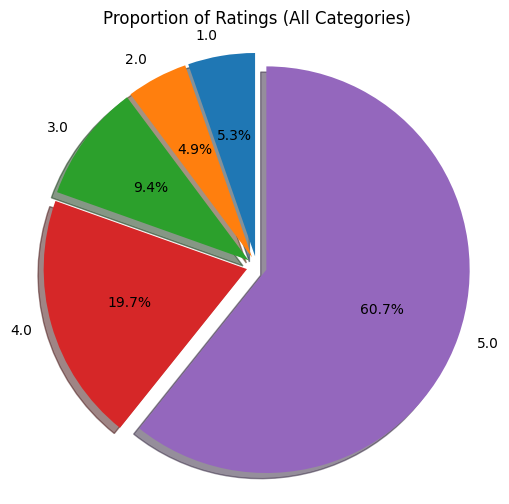

In [7]:
rating_counts = data['rating'].value_counts().sort_index()

explode = [0.05] * len(rating_counts) 

plt.figure(figsize=(6, 6))
plt.pie(
    rating_counts,
    labels=rating_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True 
)
plt.title('Proportion of Ratings (All Categories)')
plt.axis('equal')
plt.show()

C:\Users\rk\AppData\Local\Temp\ipykernel_8552\1748746896.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='label', palette='Set2')


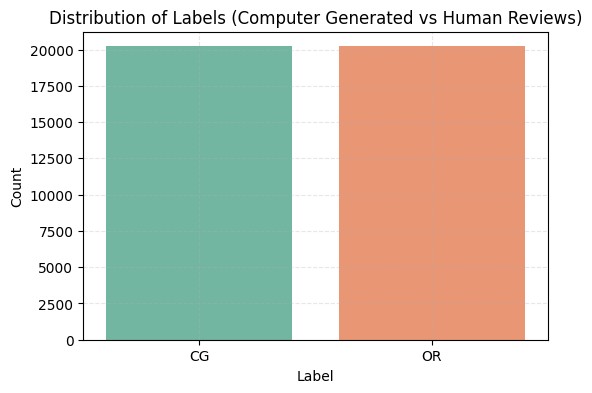

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='label', palette='Set2')
plt.title("Distribution of Labels (Computer Generated vs Human Reviews)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# 4. Data Preprocessing

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [9]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    tokens = word_tokenize(text)

    cleaned = []
    for word in tokens:
        word = word.translate(str.maketrans('', '', string.punctuation))
        if word.isalpha() and word not in stop_words:
            lemma = lemmatizer.lemmatize(word)
            cleaned.append(lemma)

    return ' '.join(cleaned)

In [ ]:
data['clean_text'] = data['text_'].apply(preprocess)

In [53]:
data.head(15)

,category,rating,label,clean_text,length
0,Home_and_Kitchen_5,5.0,CG,love well made sturdy comfortable love pretty,45
1,Home_and_Kitchen_5,5.0,CG,love great upgrade original mine couple year,44
2,Home_and_Kitchen_5,5.0,CG,pillow saved back love look feel pillow,39
3,Home_and_Kitchen_5,1.0,CG,missing information use great product price,43
4,Home_and_Kitchen_5,5.0,CG,nice set good quality set two month,35
5,Home_and_Kitchen_5,3.0,CG,wanted different flavor,23
6,Home_and_Kitchen_5,5.0,CG,perfect touch thing wish little space,37
7,Home_and_Kitchen_5,3.0,CG,done fit well look great love smoothness edge ...,51
8,Home_and_Kitchen_5,5.0,CG,great big number easy read thing nt like size,45
9,Home_and_Kitchen_5,5.0,CG,son love comforter well made also baby,38


In [12]:
data = data.drop(columns=['text_'])

# 5. EDA on Cleaned Text

In [16]:
data['length'] = data['clean_text'].apply(len)

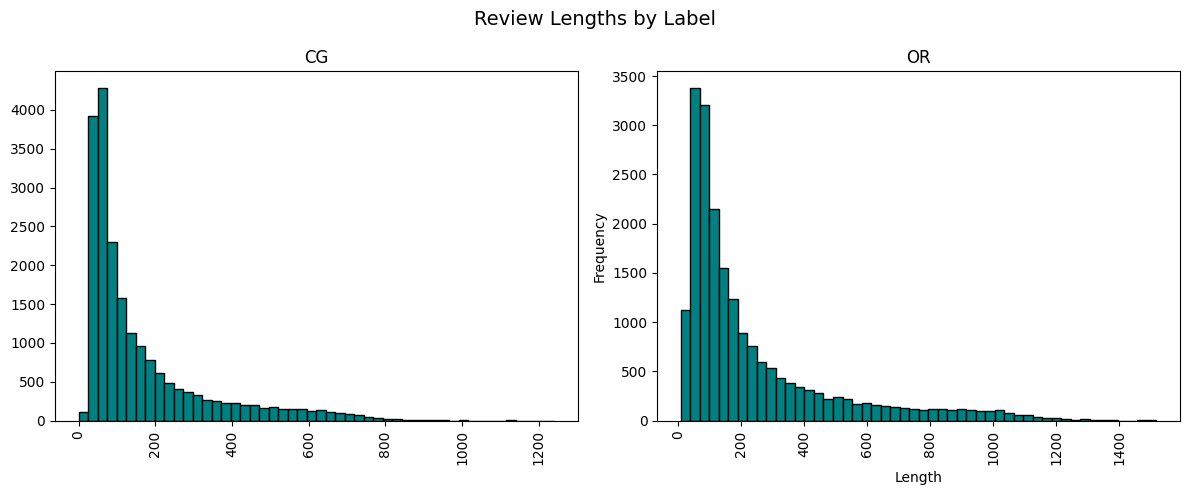

In [25]:
data.hist(column='length', by='label', bins=50, figsize=(12, 5), color='teal', edgecolor='black')
plt.suptitle("Review Lengths by Label", fontsize=14)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [40]:
longest_or = data[data['label'] == 'OR'].sort_values(by='length', ascending=False).iloc[0]
print("\nLongest Human (Original) Review:\n")
print(longest_or['clean_text'])
print("Length:", longest_or['length'])
print("Label: OR (Human Original Review)")

longest_cg = data[data['label'] == 'CG'].sort_values(by='length', ascending=False).iloc[0]
print("\nLongest Computer Generated (CG) Review:\n")
print(longest_cg['clean_text'])
print("Length:", longest_cg['length'])
print("Label: CG (Computer Generated Review)")



Longest Human (Original) Review:

tony randall star success spoil rock hunter opposite jayne mansfield hair bleached white magistrate wig jayne seems poor marilyn monroe caricature whose tendency squeak prance bubble downright annoying example ad man rock brag new business venture right sweetie president rita marlowe production inc miss marlowe titular head word brings loud squeal mansfield sound like bus trying slow brake pad story open great promise demonstration cinemascope stereo sound tony randall stand extreme stage left identifies movie see girl ca nt help vhs nbsp dvd previous jayne effort starred tom ewell appeared superior monroe another fox feature seven year itch nbsp vhs dvd although tony quite good better fact ewell opposite monroe ca nt carry load jayne incoherent boyfriend mickey hargitay weighing however lot clever bit simulated commercial clip calypso song enough bustle even chaos hold attention cameo uncrediteds groucho marx eyebrowwagging best star trek majel barre

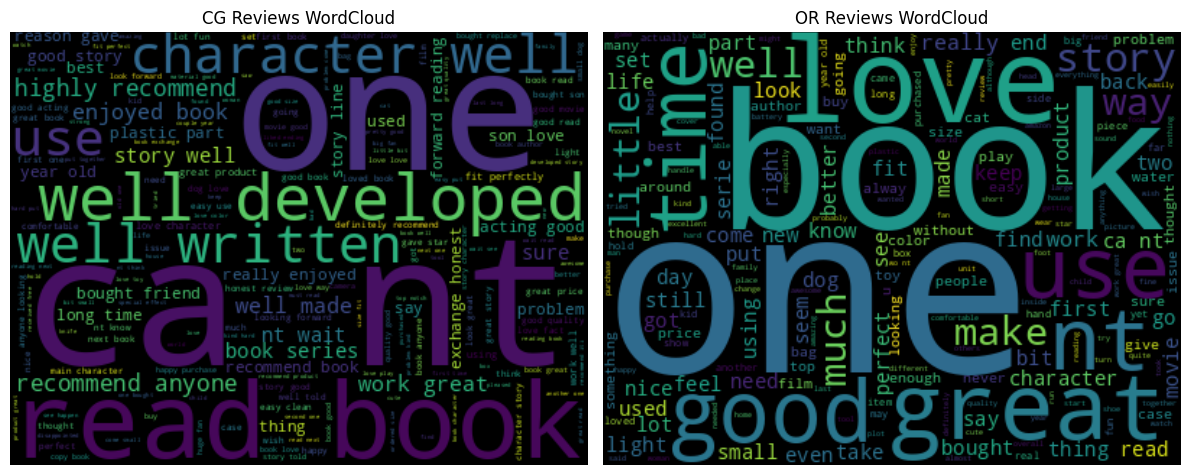

In [57]:
cg_text = " ".join(data[data['label'] == 'CG']['clean_text'])
or_text = " ".join(data[data['label'] == 'OR']['clean_text'])
wc_cg = WordCloud(width=400, height=300).generate(cg_text)
wc_or = WordCloud(width=400, height=300).generate(or_text)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(wc_cg, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('CG Reviews WordCloud')

axes[1].imshow(wc_or, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('OR Reviews WordCloud')

plt.tight_layout()
plt.show()